<a href="https://colab.research.google.com/github/dipta13/CNN-ImageClassification-Flask/blob/main/CobaTubesCC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive

In [40]:
cd /content/drive/MyDrive/DATASET_Kelompok_8

/content/drive/MyDrive/DATASET_Kelompok_8


In [43]:
ls

Jerawat/  Normal/


In [44]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [4]:
import cv2,os
data_path='/content/drive/MyDrive/DATASET_Kelompok_8'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Jerawat': 0, 'Normal': 1}
['Jerawat', 'Normal']
[0, 1]


In [5]:
img_size=244
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 244x244, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [7]:
print(labels)

[0, 1]


In [8]:
new_target.shape

(1200, 2)

 **MODEL CNN**

In [9]:
data.shape #1200 dataset, 244x244, 3 menandakan RGB

(1200, 244, 244, 3)

In [11]:
data.shape[1:]

(244, 244, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 200)     5600      
                                                                 
 activation (Activation)     (None, 242, 242, 200)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 100)     180100    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 100)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 100)      0         
 2D)                                                    

**Split data untuk Training dan Testing**

In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.25)

In [15]:
# melihat jumlah dataset yang dilakukan training sebesar 75%
train_data.shape

(900, 244, 244, 3)

In [16]:
train_target.shape

(900, 2)

In [18]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
# H = model.fit(train_data,train_target,epochs=50,validation_split=0.2)
#model.compile(loss="categorical_crossentropy", optimizer=opt,
#	metrics=["accuracy"])
H = model.fit(train_data, train_target, validation_data=(test_data, test_target), epochs=15, batch_size=32)

Epoch 1/15
29/29 [==============================] - 469s 16s/step - loss: 0.0654 - accuracy: 0.9833 - val_loss: 0.0448 - val_accuracy: 0.9800
Epoch 2/15
29/29 [==============================] - 468s 16s/step - loss: 0.0469 - accuracy: 0.9889 - val_loss: 1.7681e-04 - val_accuracy: 1.0000
Epoch 3/15
29/29 [==============================] - 460s 16s/step - loss: 0.0299 - accuracy: 0.9944 - val_loss: 1.1606e-04 - val_accuracy: 1.0000
Epoch 4/15
29/29 [==============================] - 463s 16s/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 4.9055e-04 - val_accuracy: 1.0000
Epoch 5/15
29/29 [==============================] - 467s 16s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/15
29/29 [==============================] - 468s 16s/step - loss: 0.0051 - accuracy: 0.9967 - val_loss: 9.0192e-06 - val_accuracy: 1.0000
Epoch 7/15
29/29 [==============================] - 462s 16s/step - loss: 0.0177 - accuracy: 0.9967 - val_loss: 2.1103e-04 - val_acc

In [19]:
model.save('model.h5')

In [20]:
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


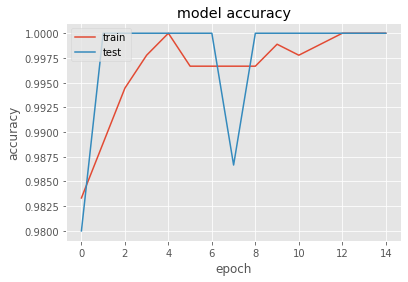

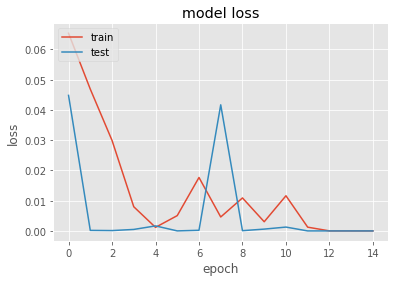

In [23]:
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

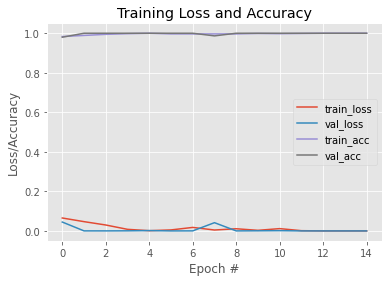

In [29]:
N = 15
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [30]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/DATASET_Kelompok_8/Jerawat/levle2_81.jpg'

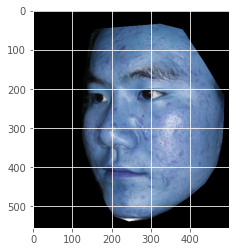

In [31]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [34]:
from PIL import Image
image_testing = Image.open('/content/drive/MyDrive/DATASET_Kelompok_8/Jerawat/levle2_81.jpg')
image_testing = np.array(image_testing.resize((244, 244))) / 255.0
image_testing.shape

(244, 244, 3)

In [35]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 244, 244, 3)


In [43]:
output = model.predict(image_testing, 1)
print(output)
print(categories)

[[1.000000e+00 7.045521e-16]]
['Jerawat', 'Normal']
